# Amruta Kulkarni-20MAI0027
Digital Assignment-01

In this pandemic situation people prefer mostly shopping online. Datasets of various shopping apps are already avaliable. I did not find any dataset on Nykaa application and also I love shopping on Nykaa and so I decided to make a Nykaa_Review dataset for this Assessment. This dataset includes the brief description as well as reviews of products available on nykaa shopping aaplication. It classifies the customer reviews as positive and negative.

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [3]:
# Loading the Nykaa_Reviews dataset
df = pd.read_csv("Nykaa_Reviews.csv")
df.head(45)

,Product_Name,Product_Category,Product_Brand,Customer_Review,Ratings,Label
0,Airpods,Tech accessories,Boat,Sound quality is impressive. Nothing to compla...,4.3,Positive
1,Lipstick,Makeup,M.A.C,Awesome shade. It will suit all complexions. I...,4.4,Positive
2,Liquid Foundation,Makeup,Maybelline New York,Most affordable foundation and one of a kind t...,4.4,Positive
3,Mascara,Makeup,Lakme Eyeconic,It is not waterproof as the company claims. Ne...,3.0,Negative
4,Bluetooth speaker,Tech accessories,Mivi,It does not work with Notebook. Its amplified ...,1.0,Negative
5,Charging pad,Tech accessories,Ambrane,Does not work. Tried with my Iphone 8 Plus as ...,2.0,Negative
6,Nail Polish,Makeup,Faces Canada Splash,This is most subtle and elegant shade you will...,4.3,Positive
7,Camera,Tech accessories,Fujifilm,Not a great upgrade at all. I have insta 9 too...,2.0,Negative
8,Sneakers,Footwear,Truffle Collection,Awesome shoe. Super light and great height. Cu...,5.0,Positive
9,Blush and contour palette,Makeup,Makeup Revolution London,Product is cheap but price is too high.,2.0,Negative


In [4]:
# Define the number of columns and rows of dataset
df.shape

(45, 6)

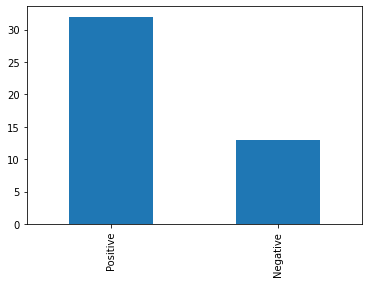

In [5]:
df['Label'].value_counts().plot(kind='bar')

In [6]:
# Detailed Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      45 non-null     object 
 1   Product_Category  45 non-null     object 
 2   Product_Brand     45 non-null     object 
 3   Customer_Review   45 non-null     object 
 4   Ratings           45 non-null     float64
 5   Label             45 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.2+ KB


In [7]:
# Encode label values from Positive to '1' and Negative to '0'
df['Label'] = df['Label'].map({'Positive':1, 'Negative':0})

In [8]:
df.head()

,Product_Name,Product_Category,Product_Brand,Customer_Review,Ratings,Label
0,Airpods,Tech accessories,Boat,Sound quality is impressive. Nothing to compla...,4.3,1
1,Lipstick,Makeup,M.A.C,Awesome shade. It will suit all complexions. I...,4.4,1
2,Liquid Foundation,Makeup,Maybelline New York,Most affordable foundation and one of a kind t...,4.4,1
3,Mascara,Makeup,Lakme Eyeconic,It is not waterproof as the company claims. Ne...,3.0,0
4,Bluetooth speaker,Tech accessories,Mivi,It does not work with Notebook. Its amplified ...,1.0,0


In [9]:
df['Customer_Review'][0]

'Sound quality is impressive. Nothing to complain abouut. The carrying case can charge the earbuds upto 3 times to a full charge. Perfect fit inside helmet while riding bike.'

In [10]:
# stemming the documents (Customer_Review column)
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language = 'english') #Snowball

def stemmer_tokenize(text):
    return[snow_stemmer.stem(word) for word in text.split()] #stemmer_tokenize()

In [11]:
stemmer_tokenize("We love coding. Hence we keep coding and learning.")

['we', 'love', 'coding.', 'henc', 'we', 'keep', 'code', 'and', 'learning.']

In [12]:
# Vectorising the text data
from sklearn.feature_extraction.text import TfidfVectorizer #Tfidfvectorizer
tfidf = TfidfVectorizer(strip_accents = None, lowercase = False, tokenizer = stemmer_tokenize, use_idf = True)
Y = df.Label.values
X = tfidf.fit_transform(df.Customer_Review)

In [13]:
# Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=25)

# Logistic Regression Classifier

In [14]:
# Call the logistic regression model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, Y_train)

LogisticRegression()

In [15]:
# Compute the predictions or Y hat
Y_pred = logit.predict(X_test)

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix

array([[ 0,  2],
       [ 0, 12]], dtype=int64)

In [17]:
# Print Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test, Y_pred)*100)

Accuracy Score: 85.71428571428571


In [18]:
# Classification Report 
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      1.00      0.92        12

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14



# Navie Bayes Classifier

In [19]:
# Calling Naive Bayes Regression model
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train.todense(), Y_train)

GaussianNB()

In [20]:
# Predict on test set.
Y_test_pred = naive_bayes_classifier.predict(X_test.todense())

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
confusion_matrix

array([[ 0,  2],
       [ 2, 10]], dtype=int64)

In [22]:
# Print Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test, Y_test_pred)*100)

Accuracy Score: 71.42857142857143


In [23]:
# Classification Report 
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.83      0.83        12

    accuracy                           0.71        14
   macro avg       0.42      0.42      0.42        14
weighted avg       0.71      0.71      0.71        14



# Conclusion
According to the above obtained results, we can say that Logistic Regression model has the best accuracy 85.71% than Naive Bayes Classifier with accuracy 71.42%